In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons
import seaborn as sns

In [25]:
x,y = make_moons(n_samples=1000,noise=0.2)
df = {"x1":x[:,0],"x2":x[:,1],"y":y}
dataset = pd.DataFrame(df)
dataset

,x1,x2,y
0,-0.818750,0.564138,0
1,0.930975,0.812473,0
2,0.327073,0.510016,0
3,-1.015401,0.602337,0
4,-0.018595,0.532928,1
...,...,...,...
995,0.007044,1.138103,0
996,1.730006,-0.251121,1
997,0.468596,-0.229125,1
998,-0.470125,1.028088,0


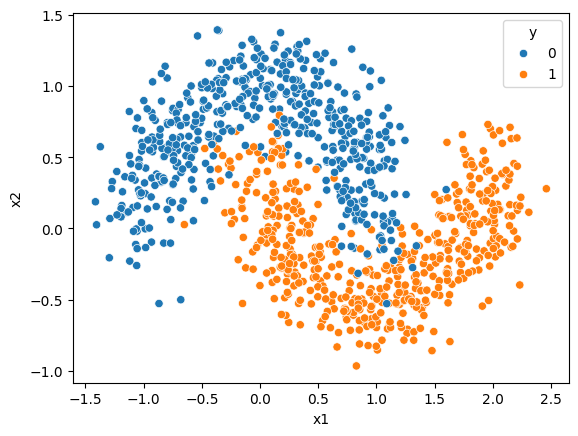

In [26]:
sns.scatterplot(x="x1",y="x2",data= dataset,hue="y")
plt.show()

In [27]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [33]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 93.5)

In [34]:
sv = SVC()
sv .fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

(96.375, 95.0)

In [36]:
gnb = GaussianNB()
gnb .fit(x_train,y_train)
gnb.score(x_train,y_train)*100 , gnb.score(x_test,y_test)*100

(86.875, 88.0)

In [51]:
from sklearn.ensemble import VotingClassifier
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb",GaussianNB())]
vc = VotingClassifier(li)
vc.fit(x_train,y_train)
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

(97.0, 95.0)

In [52]:
prd = {"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [54]:
pd.DataFrame(prd)

,dt,sv,gnb,vc
0,1,1,1,1
1,0,0,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,1,1,1,1
197,1,1,1,1
198,1,1,1,1
